In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [3]:
df = pd.read_csv('heart_disease.csv');

In [4]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


Categotical data : 'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'

Numerical data : 'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   str    
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   str    
 5   Smoking               9975 non-null   str    
 6   Family Heart Disease  9979 non-null   str    
 7   Diabetes              9970 non-null   str    
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   str    
 10  Low HDL Cholesterol   9975 non-null   str    
 11  High LDL Cholesterol  9974 non-null   str    
 12  Alcohol Consumption   7414 non-null   str    
 13  Stress Level          9978 non-null   str    
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption     9970 non-

In [6]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [7]:
df.shape

(10000, 21)

In [8]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

# Handling Missing Values

In [9]:
categorical_cols = df.select_dtypes(include=["str"]).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

In [10]:
categorical_cols

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='str')

In [11]:
numerical_cols

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='str')

In [12]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  str    
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  str    
 5   Smoking               10000 non-null  str    
 6   Family Heart Disease  10000 non-null  str    
 7   Diabetes              10000 non-null  str    
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  str    
 10  Low HDL Cholesterol   10000 non-null  str    
 11  High LDL Cholesterol  10000 non-null  str    
 12  Alcohol Consumption   10000 non-null  str    
 13  Stress Level          10000 non-null  str    
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption     10000 non

In [14]:
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

### Check duplicates

In [15]:
df.duplicated().sum()

np.int64(0)

### Therefore,  No Duplicates

## Check Data Types

In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  str    
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  str    
 5   Smoking               10000 non-null  str    
 6   Family Heart Disease  10000 non-null  str    
 7   Diabetes              10000 non-null  str    
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  str    
 10  Low HDL Cholesterol   10000 non-null  str    
 11  High LDL Cholesterol  10000 non-null  str    
 12  Alcohol Consumption   10000 non-null  str    
 13  Stress Level          10000 non-null  str    
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption     10000 non

In [17]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.142213,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.000000,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.000000,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.000000,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.000000,10.381259,8.153887,No


In [18]:
ordinal_data = ['Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Exercise Habits']
nominal_data = ['Gender', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Heart Disease Status']

In [19]:
le = LabelEncoder()
for i in ordinal_data:
    df[i] = le.fit_transform(df[i])

### We use Label Encoding?
Because:
* ML models cannot work with text
* It’s fast and memory-efficient
* Useful when categories have a natural order

In [20]:
ohe = OneHotEncoder(drop='first' , sparse_output=False , handle_unknown="ignore")
encoded = ohe.fit_transform(df[nominal_data])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(nominal_data) , index=df.index)
df = pd.concat([df.drop(columns=nominal_data) , encoded_df],axis = 1)

### One-Hot Encoding converts categorical values (like labels or names) into binary vectors (0s and 1s).
* ML models need numbers, not text
* Algorithms like Linear Regression, Logistic Regression, SVM, Neural Networks can’t process strings such as "Red" or "Male".
* One-Hot Encoding converts them into numeric form.

In [21]:
df.head()

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Heart Disease Status_Yes
0,56.0,153.0,155.0,0,24.991591,0,2,7.633228,2,342.0,...,12.969246,12.387250,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,69.0,146.0,286.0,0,25.221799,2,0,8.744034,2,133.0,...,9.355389,19.298875,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,46.0,126.0,216.0,1,29.855447,1,1,4.440440,1,393.0,...,12.709873,11.230926,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,32.0,122.0,293.0,0,24.130477,1,0,5.249405,0,293.0,...,12.509046,5.961958,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,60.0,166.0,242.0,1,20.486289,1,0,7.030971,0,263.0,...,10.381259,8.153887,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


# Univarient Analysis

### Histograms

In [22]:
cols = ohe.get_feature_names_out(nominal_data)

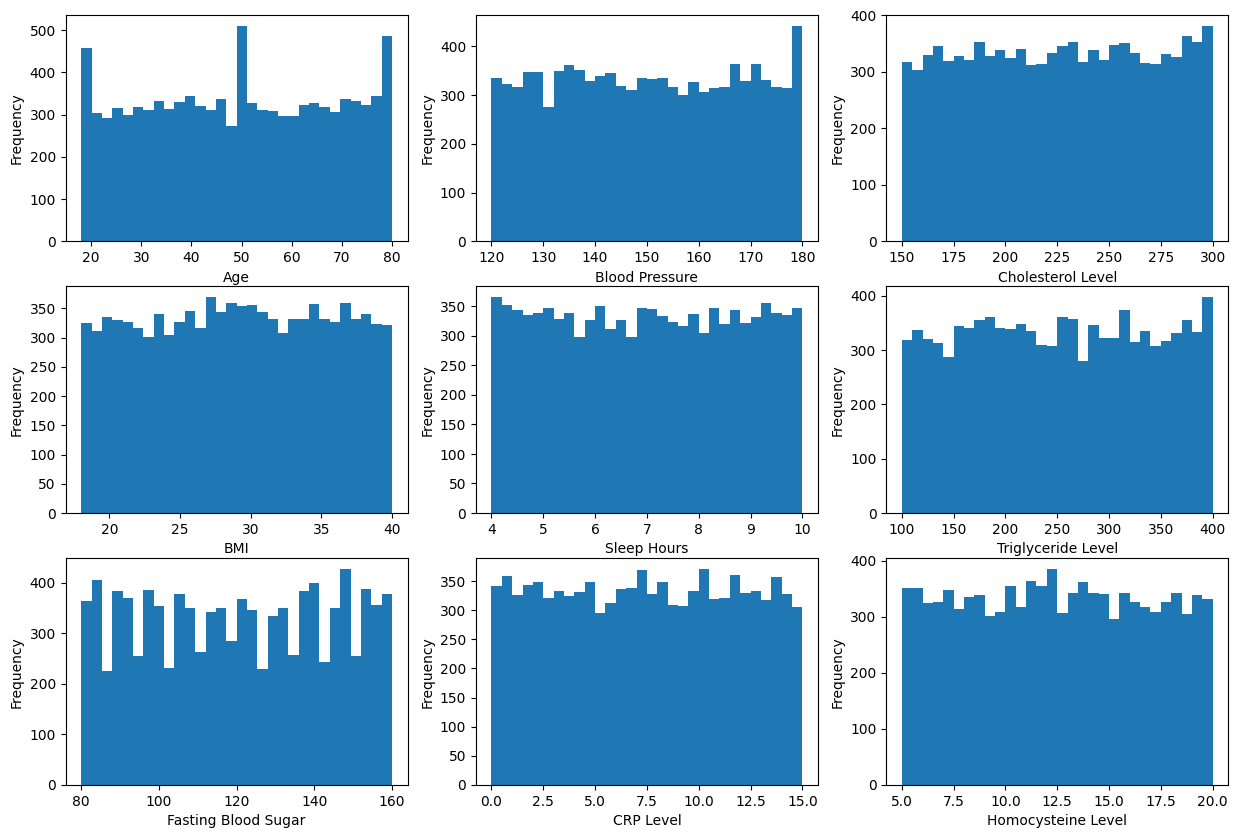

In [23]:
plt.figure(figsize=(15, 10))
for i,j in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    plt.hist(df[j] , bins=30)
    plt.ylabel("Frequency")
    plt.xlabel(j)

### Box Plot

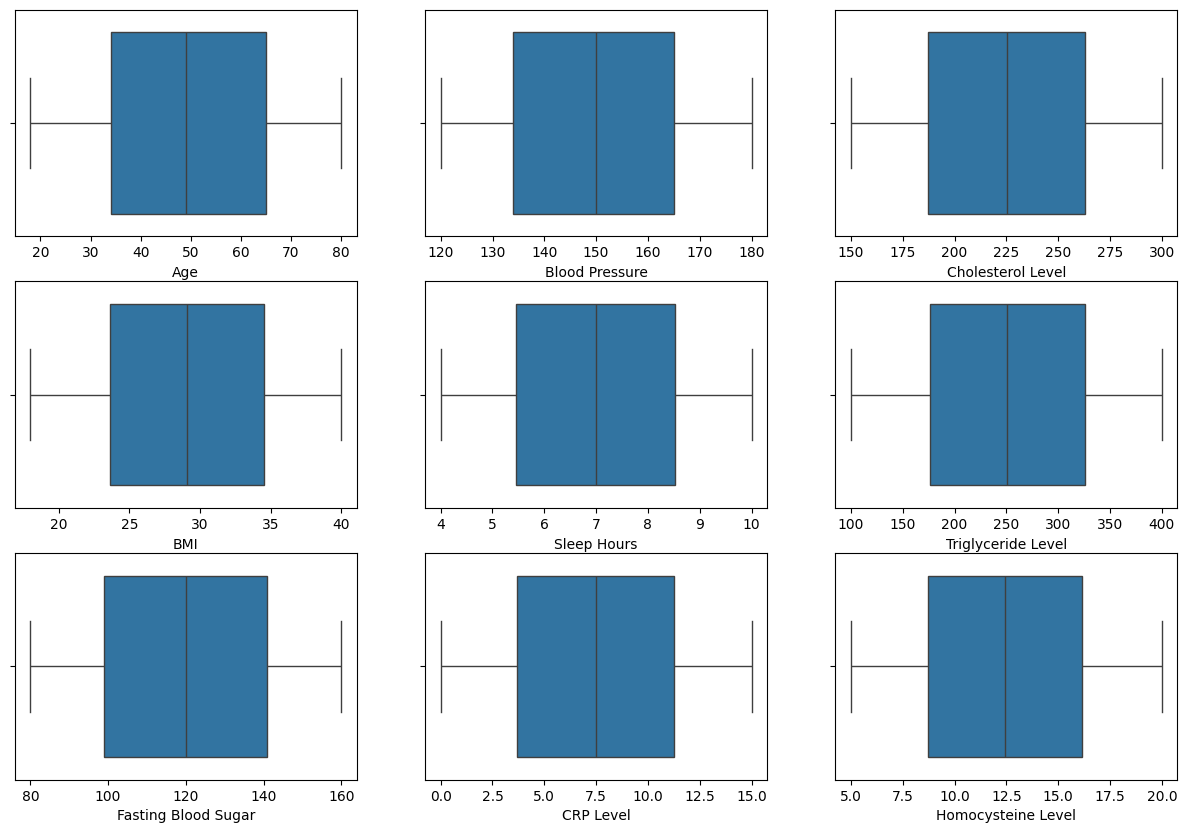

In [24]:
plt.figure(figsize=(15, 10))
for i,j in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x =df[j])

# Bivarient Analysis
### Scatter Plot

<Axes: xlabel='Blood Pressure', ylabel='Cholesterol Level'>

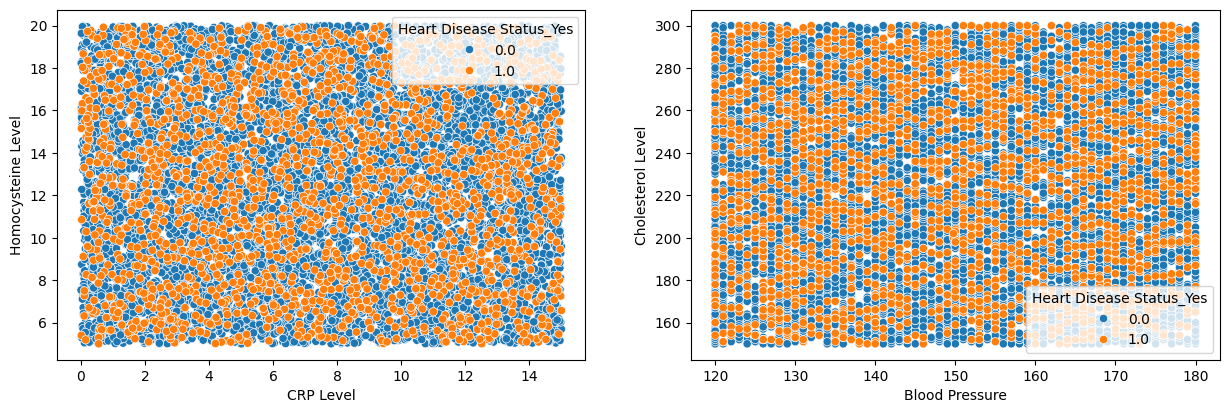

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x="CRP Level", y="Homocysteine Level" , hue="Heart Disease Status_Yes")
plt.subplot(2,2,2);
sns.scatterplot(data=df, x="Blood Pressure", y="Cholesterol Level" , hue="Heart Disease Status_Yes")

### Bar Plot

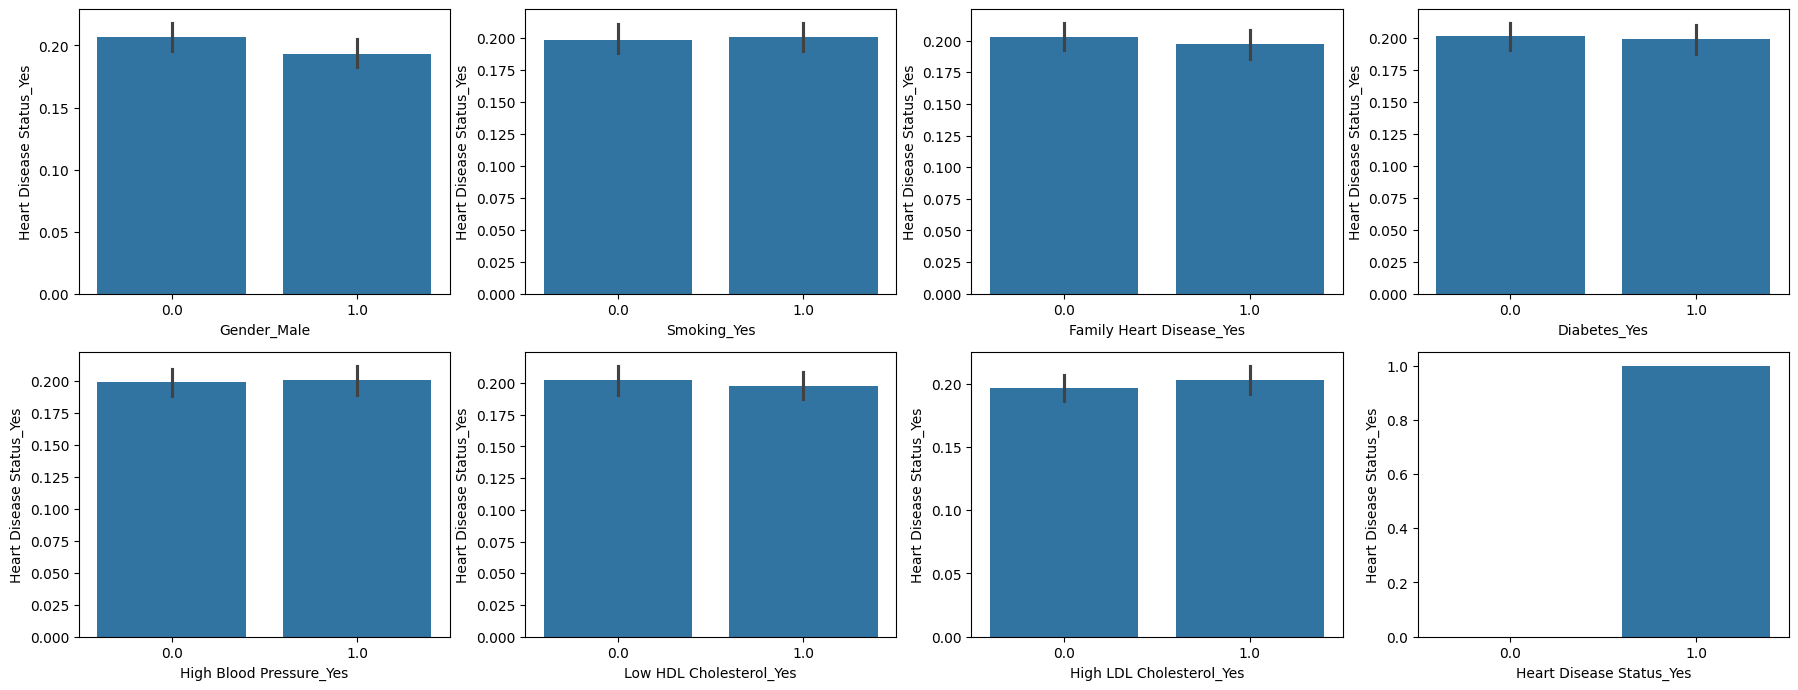

In [26]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    sns.barplot(
        x=df[col],
        y=df["Heart Disease Status_Yes"]
    )


plt.tight_layout()
plt.show()

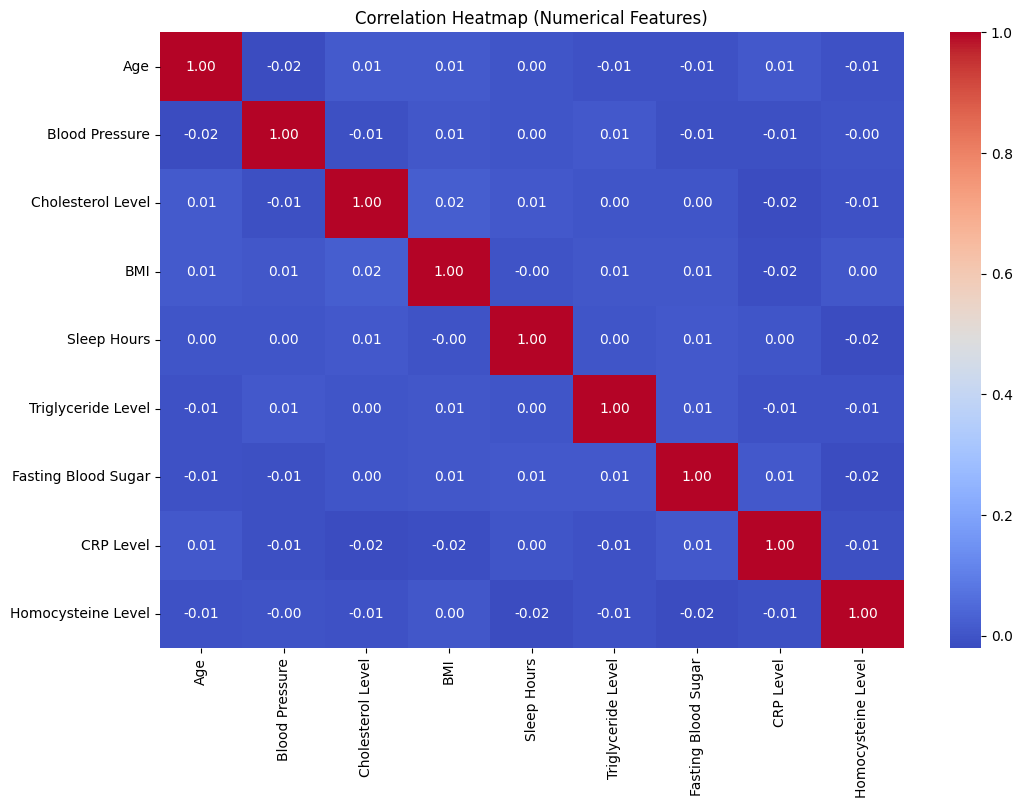

In [40]:
plt.figure(figsize=(12, 8))


corr_matrix = df[numerical_cols ].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Outlier Detection & Handling
## No outliers were detected using visual methods (box plots).

# Advanced / Niche Visualizations

<Axes: ylabel='Fasting Blood Sugar'>

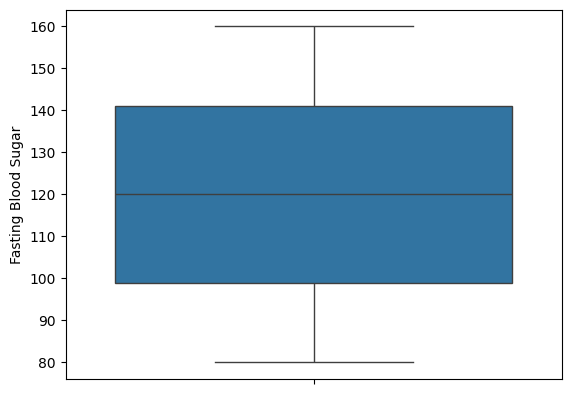

In [35]:
sns.boxplot(df['Fasting Blood Sugar'])

<Axes: xlabel='Heart Disease Status_Yes', ylabel='Age'>

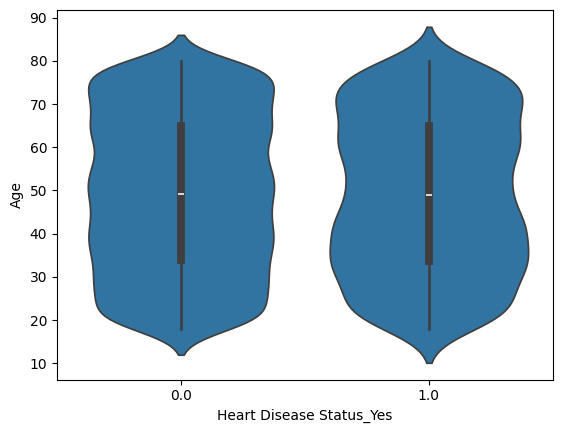

In [37]:
sns.violinplot(x='Heart Disease Status_Yes', y='Age', data=df)

# Final

In [41]:
df.shape

(10000, 21)

## Key Insights & Summary 

### 1) Weak Relationships Between Numbers
- The numeric columns are not strongly related to each other or to the target.
- Simple linear models may not work well.

### 2) Clean and Well-Organized Data
- Biomarker values (Fasting Blood Sugar, CRP, Homocysteine) are evenly spread.
- No outliers, so no need for data cleaning or transformation.

### 3) Classes Look Very Similar
- Scatter plots show heart disease and non–heart disease data mixed together.
- A single feature cannot clearly separate the two classes.

### 4) Stable Medical Features
- Features like diabetes, cholesterol, and family history are evenly distributed.
- These are reliable and useful features.

### 5) Lifestyle Factors Need Attention
- High stress, alcohol use, and sugar intake are less common.
- They may still influence the model and should be monitored.
